<a href="https://colab.research.google.com/github/ayu-shiirathore/Topsis-for-pretrained-models-of-text-generation/blob/main/Topsis_for_Pretrained_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import pi

##  Step 1: Create the decision matrix (evaluation of models)

In [2]:
models = ['GPT-3', 'GPT-2', 'BERT', 'T5']
criteria = ['Performance (BLEU)', 'Speed (Response Time)', 'Memory Consumption (MB)']

# Evaluation data (rows are models, columns are criteria)
data = np.array([
    [85.3, 0.25, 1200],  # GPT-3
    [82.1, 0.15, 800],   # GPT-2
    [87.6, 0.10, 1000],  # BERT
    [80.4, 0.20, 950],   # T5
])

df = pd.DataFrame(data, columns=criteria, index=models)


##  Step 2: Normalize the decision matrix

In [3]:
normalized_data = df.copy()
for i in range(len(criteria)):
    norm = np.linalg.norm(df.iloc[:, i])  # Euclidean norm for each column
    normalized_data.iloc[:, i] = df.iloc[:, i] / norm


## Step 3: Assign weights (example: equal weights for all criteria)

In [4]:
weights = np.array([1/3, 1/3, 1/3])  # Equal weight for each criterion

## Step 4: Calculate the weighted normalized matrix

In [5]:
weighted_data = normalized_data * weights

## Step 5: Determine the ideal and negative ideal solutions

In [6]:
ideal_solution = weighted_data.max(axis=0)  # Best for all criteria
negative_ideal_solution = weighted_data.min(axis=0)  # Worst for all criteria

## Step 6: Calculate the separation measures (Euclidean distance)

In [7]:
distance_ideal = np.sqrt(((weighted_data - ideal_solution) ** 2).sum(axis=1))
distance_negative_ideal = np.sqrt(((weighted_data - negative_ideal_solution) ** 2).sum(axis=1))


## Step 7: Calculate relative closeness to the ideal solution

In [8]:
closeness_to_ideal = distance_negative_ideal / (distance_ideal + distance_negative_ideal)


## Step 8: Rank the models based on closeness

In [9]:
ranking = pd.Series(closeness_to_ideal, index=models).sort_values(ascending=False)

## Step 9: Visualize the results

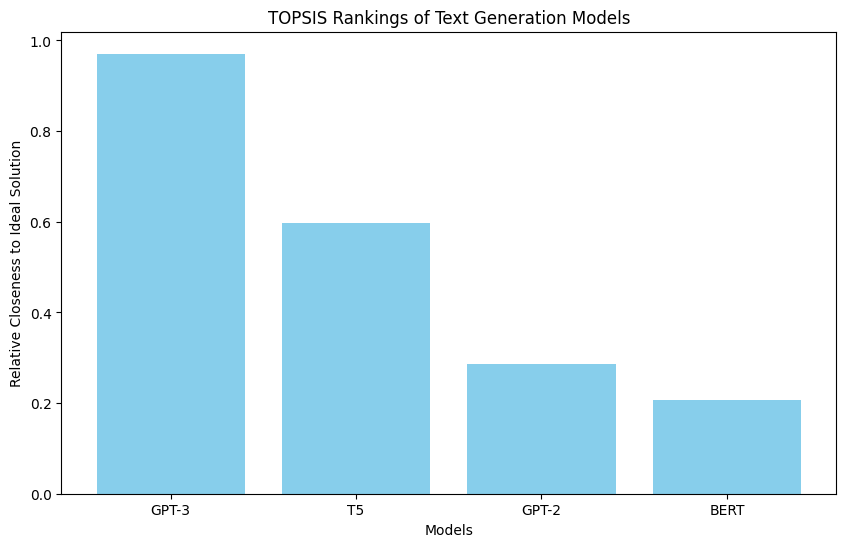

In [10]:
# 1. Bar Chart for TOPSIS Rankings
plt.figure(figsize=(10, 6))
plt.bar(ranking.index, ranking.values, color='skyblue')
plt.title("TOPSIS Rankings of Text Generation Models")
plt.xlabel("Models")
plt.ylabel("Relative Closeness to Ideal Solution")
plt.show()

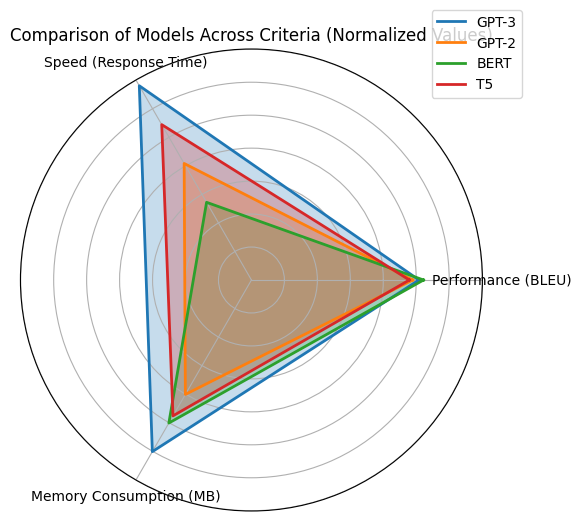

In [12]:
# 2. Radar Chart (Spider plot) for Model Evaluation across Criteria
categories = criteria
N = len(categories)
# Get the values for each model
values = df.values
values_normalized = normalized_data.values

# Repeat the first value to close the circle
values = np.concatenate((values, values[:,[0]]), axis=1)
values_normalized = np.concatenate((values_normalized, values_normalized[:,[0]]), axis=1)

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), dpi=100, subplot_kw=dict(polar=True))

for i, model in enumerate(models):
    ax.plot(angles, values_normalized[i], linewidth=2, label=model)
    ax.fill(angles, values_normalized[i], alpha=0.25)

ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
plt.title("Comparison of Models Across Criteria (Normalized Values)")
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

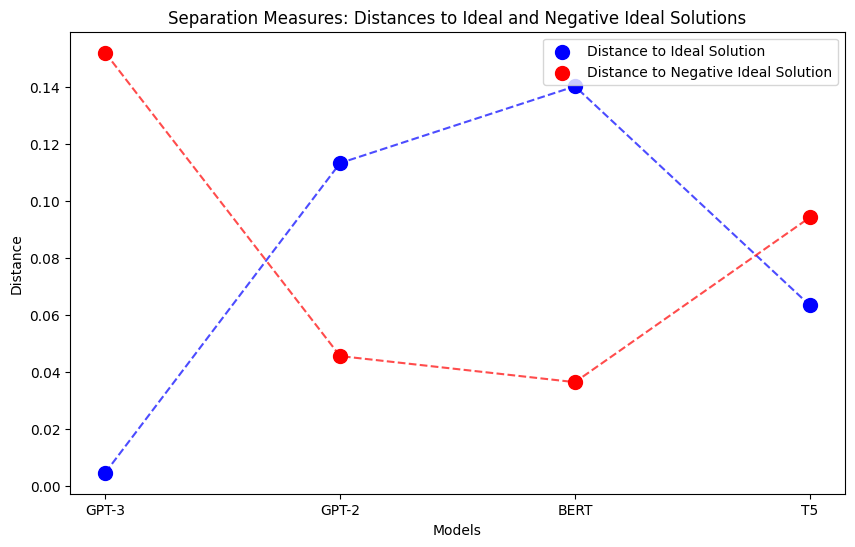

In [13]:
# 3. Scatter Plot of Distances (to Ideal and Negative Ideal Solutions)
plt.figure(figsize=(10, 6))
plt.scatter(models, distance_ideal, color='blue', label="Distance to Ideal Solution", s=100)
plt.scatter(models, distance_negative_ideal, color='red', label="Distance to Negative Ideal Solution", s=100)
plt.plot(models, distance_ideal, color='blue', linestyle='--', alpha=0.7)
plt.plot(models, distance_negative_ideal, color='red', linestyle='--', alpha=0.7)

plt.title("Separation Measures: Distances to Ideal and Negative Ideal Solutions")
plt.xlabel("Models")
plt.ylabel("Distance")
plt.legend()
plt.show()

In [14]:
# Display the results as a table
ranking_table = pd.DataFrame({
    'Model': ranking.index,
    'Closeness to Ideal': ranking.values
}).reset_index(drop=True)

print(ranking_table)

   Model  Closeness to Ideal
0  GPT-3            0.970801
1     T5            0.597914
2  GPT-2            0.286647
3   BERT            0.205934
